In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import re

In [4]:
df=pd.read_csv(r"C:\Users\Administrator\Items.csv")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9660\2165654499.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Administrator\Items.csv")


In [5]:
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
df=df.drop(["Price","Country","Date","CustomerID"],axis=1)
df

,BillNo,Itemname,Quantity
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,WHITE METAL LANTERN,6
2,536365,CREAM CUPID HEARTS COAT HANGER,8
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12
522060,581587,CHILDREN'S APRON DOLLY GIRL,6
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   BillNo    522064 non-null  object
 1   Itemname  520609 non-null  object
 2   Quantity  522064 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 11.9+ MB


In [8]:
df.isna().sum()

BillNo         0
Itemname    1455
Quantity       0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520609 entries, 0 to 522063
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   BillNo    520609 non-null  object
 1   Itemname  520609 non-null  object
 2   Quantity  520609 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 15.9+ MB


In [11]:
x=df["Itemname"].value_counts().sort_values(ascending=False)[:20]
x

Itemname
WHITE HANGING HEART T-LIGHT HOLDER    2269
JUMBO BAG RED RETROSPOT               2087
REGENCY CAKESTAND 3 TIER              1930
PARTY BUNTING                         1677
LUNCH BAG RED RETROSPOT               1570
ASSORTED COLOUR BIRD ORNAMENT         1465
SET OF 3 CAKE TINS PANTRY DESIGN      1360
PACK OF 72 RETROSPOT CAKE CASES       1328
LUNCH BAG  BLACK SKULL.               1315
NATURAL SLATE HEART CHALKBOARD        1246
JUMBO BAG PINK POLKADOT               1231
HEART OF WICKER SMALL                 1206
JUMBO STORAGE BAG SUKI                1191
PAPER CHAIN KIT 50'S CHRISTMAS        1183
JUMBO SHOPPER VINTAGE RED PAISLEY     1181
LUNCH BAG SPACEBOY DESIGN             1169
LUNCH BAG CARS BLUE                   1156
SPOTTY BUNTING                        1133
JAM MAKING SET PRINTED                1123
LUNCH BAG SUKI DESIGN                 1112
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(0, 1, 'JUMBO BAG RED RETROSPOT'),
  Text(0, 2, 'REGENCY CAKESTAND 3 TIER'),
  Text(0, 3, 'PARTY BUNTING'),
  Text(0, 4, 'LUNCH BAG RED RETROSPOT'),
  Text(0, 5, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(0, 6, 'SET OF 3 CAKE TINS PANTRY DESIGN'),
  Text(0, 7, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(0, 8, 'LUNCH BAG  BLACK SKULL.'),
  Text(0, 9, 'NATURAL SLATE HEART CHALKBOARD'),
  Text(0, 10, 'JUMBO BAG PINK POLKADOT'),
  Text(0, 11, 'HEART OF WICKER SMALL'),
  Text(0, 12, 'JUMBO STORAGE BAG SUKI'),
  Text(0, 13, "PAPER CHAIN KIT 50'S CHRISTMAS"),
  Text(0, 14, 'JUMBO SHOPPER VINTAGE RED PAISLEY'),
  Text(0, 15, 'LUNCH BAG SPACEBOY DESIGN'),
  Text(0, 16, 'LUNCH BAG CARS BLUE'),
  Text(0, 17, 'SPOTTY BUNTING'),
  Text(0, 18, 'JAM MAKING SET PRINTED'),
  Text(0, 19, 'LUNCH BAG SUKI DESIGN')])

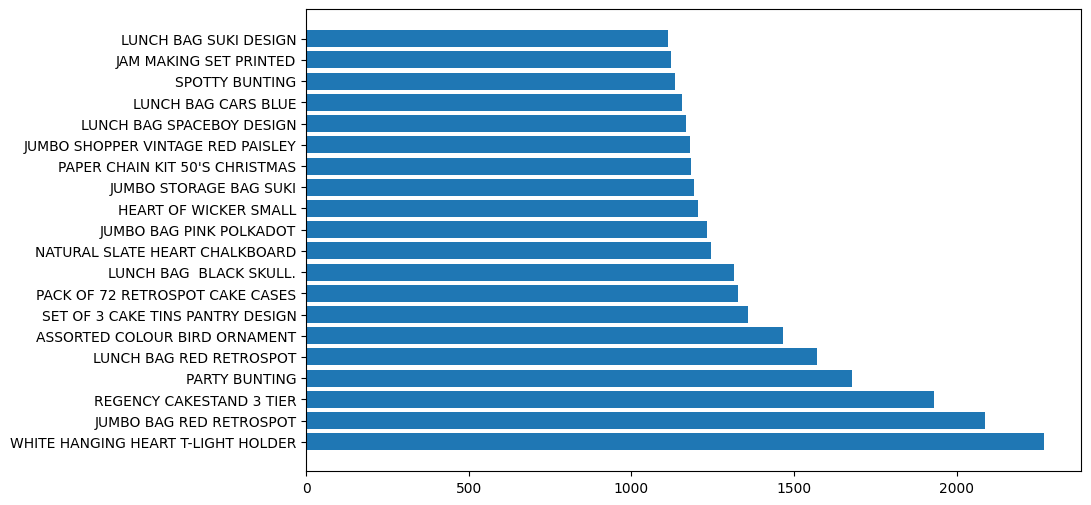

In [12]:
plt.figure(figsize=(10,6))
plt.barh(x.index,x.values)
plt.yticks(rotation=0)

In [13]:
#df['Quantity']=1
#df

In [14]:
transactions=df.groupby(['BillNo','Itemname'])['Quantity'].sum().unstack().reset_index().set_index('BillNo')

In [15]:
transactions[50:70]

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
transactions=transactions.fillna(0)
transactions[50:70]

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def encode(x):
    if x<=0:
        return 0
    elif x>=0:
        return 1

In [18]:
basket=transactions.applymap(encode)
basket[50:70]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9660\600753537.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket=transactions.applymap(encode)


Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
frequent_itemsets=apriori(basket,min_support=0.03,use_colnames=True,max_len=2)
rules=association_rules(frequent_itemsets,metric="support",min_threshold=0.02)

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [26]:
frequent_itemsets

,support,itemsets
0,0.046611,(6 RIBBONS RUSTIC CHARM)
1,0.039485,(60 TEATIME FAIRY CAKE CASES)
2,0.047848,(ALARM CLOCK BAKELIKE GREEN)
3,0.037556,(ALARM CLOCK BAKELIKE PINK)
4,0.050816,(ALARM CLOCK BAKELIKE RED)
...,...,...
120,0.036170,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC..."
121,0.040524,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA..."
122,0.033449,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
123,0.035675,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)"


In [27]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047848,0.050816,0.031321,0.654602,12.881698,0.028890,2.748085,0.968721
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.050816,0.047848,0.031321,0.616358,12.881698,0.028890,2.481879,0.971751
2,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.050124,0.048243,0.036170,0.721619,14.957866,0.033752,3.418899,0.982386
3,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.048243,0.050124,0.036170,0.749744,14.957866,0.033752,3.795612,0.980446
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102128,0.059921,0.040524,0.396802,6.622110,0.034405,1.558493,0.945558
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059921,0.102128,0.040524,0.676301,6.622110,0.034405,2.773784,0.903106
6,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.057694,0.102128,0.033449,0.579760,5.676815,0.027557,2.136570,0.874286
7,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.102128,0.057694,0.033449,0.327519,5.676815,0.027557,1.401239,0.917552
8,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.058288,0.102128,0.035675,0.612054,5.993032,0.029723,2.314428,0.884707
9,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.102128,0.058288,0.035675,0.349322,5.993032,0.029723,1.447277,0.927904


In [34]:
milk_rules = rules[rules['antecedents'].astype(str).str.contains('JUMBO BAG RED RETROSPOT')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)
milk_rules[milk_rules["confidence"]>=0.1]
#display(milk_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102128,0.059921,0.040524,0.396802,6.622110,0.034405,1.558493,0.945558
1,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.102128,0.058288,0.035675,0.349322,5.993032,0.029723,1.447277,0.927904
2,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.102128,0.057694,0.033449,0.327519,5.676815,0.027557,1.401239,0.917552


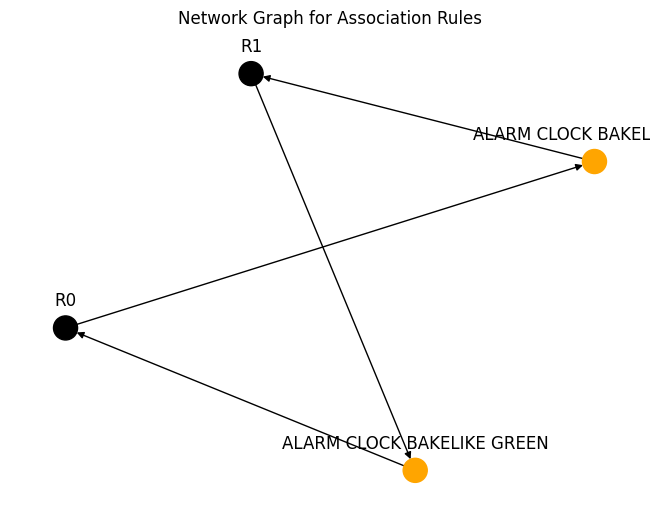

In [35]:
def draw_network(rules,rules_to_show):
    #directional graph from NetworkX
    network=nx.DiGraph()

    #loop through number of rules to show
    for i in range(rules_to_show):

        #add a rule node
        network.add_node("R"+str(i),color="black") # Add rule node in black color

        #add antecedents as nodes and edges
        for antecedent in rules.iloc[i]['antecedents']:
            network.add_node(antecedent,color='orange') # Add antecedent node with orange color
            network.add_edge(antecedent,"R"+str(i),weight=2) # Link antecedent to rule

        #add consequents as nodes and edges
        for consequent in rules.iloc[i]['consequents']:
            network.add_node(consequent,color='orange') # Add consequent node with orange color
            network.add_edge("R"+str(i),consequent,weight=2) # Link rule to consequent

    #extract node colors for visualization
    node_colors=[network.nodes[node]['color'] for node in network.nodes]

    #position nodes using spring layout
    pos=nx.spring_layout(network,k=16,scale=1)

    #draw the network graph
    nx.draw(network,pos,node_color=node_colors,font_size=8)

    #shift the text position upwards
    for p in pos:
        pos[p][1]+=0.12

    #drawing labels
    nx.draw_networkx_labels(network, pos)

    #set title and display the graph
    plt.title("Network Graph for Association Rules")
draw_network(rules, 2)